In [9]:
import pandas as pd
partner_data = pd.read_excel('Case study - Partner Data.xlsx', sheet_name='Sheet2')

In [10]:
partner_data.head()

,Partner ID,Tasks,Acceptance rate,Cancellation rate,Tasks not delivered,Partner Cancellation,Task Time,Interaction Rate,Contact Rate,Rating
0,241336,118,87.42,1.26,0,0.72,34.81,38.98,24.58,4.75
1,241337,24,100.00,0.00,0,0.00,39.79,62.50,16.67,5.00
2,241338,9,90.91,0.00,0,0.00,40.34,22.22,0.00,4.89
3,241339,44,100.00,4.08,0,0.00,32.66,38.64,2.27,4.74
4,241340,9,64.71,5.88,0,0.00,33.17,44.44,0.00,4.40


In [11]:
partner_data.describe()

,Partner ID,Tasks,Acceptance rate,Cancellation rate,Tasks not delivered,Partner Cancellation,Task Time,Interaction Rate,Contact Rate,Rating
count,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3553.000000,3507.000000
mean,243112.000000,34.268787,89.727982,1.508055,0.031241,0.484723,42.682094,41.332688,12.214863,4.697910
std,1025.807081,30.328932,14.231320,4.641430,0.190964,2.037372,20.666945,17.529772,12.781136,0.327074
min,241336.000000,2.000000,8.700000,0.000000,0.000000,0.000000,2.940000,0.000000,0.000000,1.000000
25%,242224.000000,10.000000,86.490000,0.000000,0.000000,0.000000,33.260000,31.750000,2.860000,4.600000
50%,243112.000000,26.000000,94.670000,0.000000,0.000000,0.000000,41.900000,41.670000,9.380000,4.760000
75%,244000.000000,49.000000,100.000000,0.720000,0.000000,0.000000,49.820000,50.960000,17.310000,4.900000
max,244888.000000,186.000000,100.000000,64.580000,4.000000,33.330000,759.590000,100.000000,100.000000,5.000000


In [ ]:
#Data Preprocessing

In [12]:
partner_data.nunique()

Partner ID              3553
Tasks                    144
Acceptance rate          779
Cancellation rate        252
Tasks not delivered        5
Partner Cancellation     153
Task Time               2536
Interaction Rate         828
Contact Rate             593
Rating                   114
dtype: int64

In [13]:
partner_data.isnull().sum()

Partner ID               0
Tasks                    0
Acceptance rate          0
Cancellation rate        0
Tasks not delivered      0
Partner Cancellation     0
Task Time                0
Interaction Rate         0
Contact Rate             0
Rating                  46
dtype: int64

In [ ]:
#mean imputation

In [14]:
mean_ratings=partner_data['Rating'].mean()
partner_data['Rating']=partner_data['Rating'].fillna(mean_ratings)

In [15]:
partner_data.isnull().sum()

Partner ID              0
Tasks                   0
Acceptance rate         0
Cancellation rate       0
Tasks not delivered     0
Partner Cancellation    0
Task Time               0
Interaction Rate        0
Contact Rate            0
Rating                  0
dtype: int64

In [40]:
partner_data.tail()

,Partner ID,Tasks,Acceptance rate,Cancellation rate,Tasks not delivered,Partner Cancellation,Task Time,Interaction Rate,Contact Rate,Rating,Partner Quality Score
3548,244884,3,58.33,8.33,0,0.0,60.83,33.33,100.00,5.00000,26.498500
3549,244885,3,66.67,0.00,0,0.0,46.84,0.00,0.00,4.50000,16.935000
3550,244886,3,100.00,0.00,0,0.0,73.14,0.00,66.67,4.69791,28.901082
3551,244887,5,100.00,0.00,0,0.0,46.01,40.00,0.00,4.69791,22.141582
3552,244888,4,71.43,0.00,0,0.0,57.92,0.00,25.00,4.69791,20.916582


In [19]:
#feature importance of metrics to assign weightage

In [41]:
partner_data['Partner Quality Score'] = (
    (partner_data['Acceptance rate'] * 0.1) +
    (partner_data['Cancellation rate'] * 0.1) +
    (partner_data['Tasks not delivered'] * 0.2) +
    (partner_data['Partner Cancellation'] * 0.1) +
    (partner_data['Task Time'] * 0.2) +
    (partner_data['Interaction Rate'] * 0.05) +
    (partner_data['Contact Rate'] * 0.05) +
    (partner_data['Rating'] * 0.2)
)

In [26]:
#set threshold limit where difference from high performing partners and low performing partners

In [65]:
threshold_limit = 20

In [ ]:
# Identify Partners for Retraining

In [66]:
partners_retraining = partner_data[partner_data['Partner Quality Score'] < threshold_limit]['Partner ID'].unique()

In [ ]:
# segement of Partners in Retraining Bucket
# Segment for partners who fall in the retraining bucket more than once.
# Segment for partners who require retraining for the first time.
#partners Required training 

In [67]:
if len(partners_retraining) > 0:
    print("Partners requiring retraining:")
    for partner_id in partners_retraining:
        partner_retraining_count = partner_data[partner_data['Partner ID'] == partner_id]['Partner Quality Score'].lt(threshold_limit).sum()
        if partner_retraining_count > 1:
            print(f"Partner ID: {partner_id} - Requires retraining multiple times.")
        else:
            print(f"Partner ID: {partner_id} - Requires retraining.")

Partners requiring retraining:
Partner ID: 241338 - Requires retraining.
Partner ID: 241339 - Requires retraining.
Partner ID: 241340 - Requires retraining.
Partner ID: 241343 - Requires retraining.
Partner ID: 241344 - Requires retraining.
Partner ID: 241346 - Requires retraining.
Partner ID: 241348 - Requires retraining.
Partner ID: 241351 - Requires retraining.
Partner ID: 241352 - Requires retraining.
Partner ID: 241354 - Requires retraining.
Partner ID: 241356 - Requires retraining.
Partner ID: 241360 - Requires retraining.
Partner ID: 241362 - Requires retraining.
Partner ID: 241365 - Requires retraining.
Partner ID: 241366 - Requires retraining.
Partner ID: 241369 - Requires retraining.
Partner ID: 241370 - Requires retraining.
Partner ID: 241371 - Requires retraining.
Partner ID: 241374 - Requires retraining.
Partner ID: 241375 - Requires retraining.
Partner ID: 241376 - Requires retraining.
Partner ID: 241377 - Requires retraining.
Partner ID: 241381 - Requires retraining.
Par

In [ ]:
#Partner Quality Score

In [68]:
print(partner_data[['Partner ID', 'Tasks', 'Acceptance rate', 'Cancellation rate', 'Tasks not delivered',
                    'Partner Cancellation', 'Task Time', 'Interaction Rate', 'Contact Rate', 'Rating',
                    'Partner Quality Score']])

      Partner ID  Tasks  Acceptance rate  Cancellation rate  \
0         241336    118            87.42               1.26   
1         241337     24           100.00               0.00   
2         241338      9            90.91               0.00   
3         241339     44           100.00               4.08   
4         241340      9            64.71               5.88   
...          ...    ...              ...                ...   
3548      244884      3            58.33               8.33   
3549      244885      3            66.67               0.00   
3550      244886      3           100.00               0.00   
3551      244887      5           100.00               0.00   
3552      244888      4            71.43               0.00   

      Tasks not delivered  Partner Cancellation  Task Time  Interaction Rate  \
0                       0                  0.72      34.81             38.98   
1                       0                  0.00      39.79             62.50   
2  

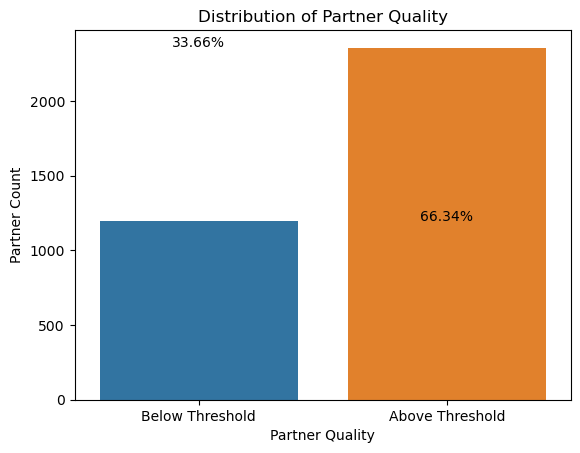

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
threshold = 20
partner_data['Partner Quality'] = (partner_data['Partner Quality Score'] >= threshold).astype(int)
quality_counts = partner_data['Partner Quality'].value_counts()
total_partners = len(partner_data)
quality_percentages = quality_counts / total_partners * 100
sns.barplot(x=quality_counts.index, y=quality_counts.values)
plt.xlabel('Partner Quality')
plt.ylabel('Partner Count')
plt.title('Distribution of Partner Quality')
plt.xticks([0, 1], ['Below Threshold', 'Above Threshold'])
for i, count in enumerate(quality_counts):
    plt.text(i, count + 5, f'{quality_percentages[i]:.2f}%', ha='center')
plt.show()

In [46]:
partner_data.to_excel('Precision_Quality.xlsx', index=False)